In [2]:
import numpy as np
import pandas as pd
import json
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pickle as pkl
import imblearn
np.random.seed(1332)
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sys                                               #### Filling the missing values using KNN because the dataset is very less
from impyute.imputation.cs import fast_knn
import imblearn                                      ### sampling the data using the smote method
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import sklearn
import xgboost
from xgboost import XGBClassifier              ### XGBoost classification method
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import cv


In [2]:
excel = pd.ExcelFile('Coronna Data CERTAIN with KVB edits.xlsx')
df = pd.read_excel(excel, 'BL+3M')

In [3]:
df

,3MResponse,SubjectID,UNMC_id,init_group,grp,Type I IFN activity,IFNβ activity final,IFNα activity final,IFNβ/α ratio final,CDate,...,BLswollen_jts_28,BLmd_global_assess,BLpt_global_assess,BLdi,BLpt_pain,BLusresultsCRP,DAS28-CRP BL,usresultsIgA.1,usresultsIgG.1,usresultsIgM.1
0,Good,001-01-0171,U00016,bionaive TNF,cimzia,0.000000,NaN,NaN,NaN,2012-06-25,...,3,35.0,10.0,0.00,10.0,4.41,3.444942,284.0,1640.0,94.0
1,No Response,001-01-0174,U00017,bionaive TNF,enbrel,0.814954,0.714954,0.714954,1.000000,2013-03-25,...,3,35.0,17.0,0.25,25.0,1.19,2.935127,207.0,1010.0,56.0
2,Moderate,001-01-0177,U00018,bionaive TNF,enbrel,4.582632,2.869955,4.482632,0.640239,2012-09-13,...,6,40.0,10.0,0.00,5.0,0.40,2.698947,190.0,657.0,100.0
3,Moderate,001-01-0208,U00022,bionaive TNF,enbrel,0.015811,NaN,NaN,NaN,2014-04-08,...,9,55.0,50.0,0.25,60.0,1.00,3.719481,44.0,948.0,51.0
4,Good,001-02-0163,U00026,bionaive TNF,humira,0.683486,0.583486,0.583486,1.000000,2012-04-23,...,13,65.0,20.0,0.25,65.0,0.25,4.425214,155.0,824.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,Moderate,094-03-0314,U01220,bionaive TNF,humira,0.379131,0.279131,0.279131,1.000000,2013-04-24,...,9,70.0,15.0,0.00,65.0,6.02,2.711555,125.0,1000.0,77.0
292,Moderate,094-03-0315,U01221,bionaive TNF,enbrel,0.000000,NaN,NaN,NaN,2013-04-19,...,7,55.0,80.0,1.00,80.0,7.33,5.167880,353.0,859.0,211.0
293,No Response,094-03-0317,U01222,bionaive TNF,humira,0.000000,NaN,NaN,NaN,2013-05-15,...,6,35.0,50.0,0.00,15.0,22.36,4.272186,266.0,1330.0,253.0
294,Good,094-03-0324,U01227,bionaive TNF,humira,0.000000,NaN,NaN,NaN,2014-01-06,...,5,35.0,15.0,0.00,15.0,0.92,3.283134,163.0,1500.0,44.0


In [4]:
df = df.drop(columns = ['SubjectID', 'CDate', 'Match'])    ### Unique values
df = df.drop(columns = ['SubjectID.1', 'UNMC_id.1', 'CDate.1', 'init_group.1', 'grp.1', 'UNMC_id.2', 'grp.2', 'init_group.2', 'CDate.1', 'futime.1'])    ### Duplicate values
df = df.drop(columns = ['init_group', 'futime'])    ### same values for all rows

In [5]:
df.isnull().mean()[df.isnull().mean() > 0.7]   

statin_use          1.000000
smkyrs              0.753378
numcigs             0.783784
rfstatus_impute     0.996622
ccpstatus_impute    0.972973
statin_use.1        1.000000
dtype: float64

In [6]:
df = df.drop(columns = ['statin_use', 'rfstatus_impute', 'ccpstatus_impute', 'statin_use.1', 'smkyrs', 'numcigs'])  ### Dropping columns who have null values greater than 70%

In [7]:
df = df.drop(columns = ['DAS28-CRP 3m', 'DAS28-CRP BL'])

In [8]:
df = df.rename(columns={"usresultsIgA.1": "usresultsIgA_BL", "usresultsIgG.1": "usresultsIgG_BL", "usresultsIgM.1": "usresultsIgM_BL", 'seatedbp1.1': 'seatedbp1_BL',
                              'seatedbp2.1': 'seatedbp2_BL', 'pres_mtx.1': 'pres_mtx_BL', 'pres_arava.1': 'pres_arava_BL', 'pres_azulfidine.1': 'pres_azulfidine_BL', 
                              'pres_plaquenil.1': 'pres_plaquenil_BL', 'pres_imuran.1': 'pres_imuran_BL', 'pres_minocin.1': 'pres_minocin_BL', 'pres_pred.1': 'pres_pred_BL',
                              'statin_use.1': 'statin_use_BL', 'tender_jts_28.1': 'tender_jts_28_BL', 'BLswollen_jts_28': 'swollen_jts_28_BL',
                              'BLmd_global_assess': 'md_global_assess_BL', 'BLpt_global_assess': 'pt_global_assess_BL', 'BLdi': 'di_BL', 'BLpt_pain': 'pt_pain_BL', 'BLusresultsCRP': 'usresultsCRP_BL',
                              'DAS28-CRP BL': 'DAS28-CRP_BL', })     ### Renaming some columns. Not sure why - did it because previous student did it

In [9]:
df = df.drop('UNMC_id',1)
final_df = df
model_label = LabelEncoder()
final_df['grp'] = model_label.fit_transform(final_df['grp'].astype('str'))
final_df['gender'] = model_label.fit_transform(final_df['gender'].astype('str'))
final_df['final_education'] = model_label.fit_transform(final_df['final_education'].astype('str'))
final_df['race_grp'] = model_label.fit_transform(final_df['race_grp'].astype('str'))
final_df['newsmoker'] = model_label.fit_transform(final_df['newsmoker'].astype('str'))
final_df['drinker'] = model_label.fit_transform(final_df['drinker'].astype('str'))
final_df['ara_func_class'] = model_label.fit_transform(final_df['ara_func_class'].astype('str'))

/state/partition1/job-14544487/ipykernel_3206223/2061900728.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('UNMC_id',1)


In [10]:
final_df = final_df[final_df['3MResponse'] != 'Unknown']     ### We don't need unknown category in our classification data so removing that category
X = final_df.drop('3MResponse',1)                            ### Dividing the dataframe into X and y set
y = final_df['3MResponse']

/state/partition1/job-14544487/ipykernel_3206223/977483231.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = final_df.drop('3MResponse',1)                            ### Dividing the dataframe into X and y set


In [11]:
def KNN(new_df):
    sys.setrecursionlimit(100000) 
    imputed_training=fast_knn(new_df.values, k=15)
    return imputed_training
imputed_training = KNN(X)
c = list(X.columns)
df_without_nulls = pd.DataFrame(imputed_training, columns=c)

In [12]:
y = model_label.fit_transform(y.astype('str'))


In [13]:
labels = ['grp','gender','final_education','race_grp','newsmoker','drinker','ara_func_class']     ### normalizing the dataset

for i in df_without_nulls.columns:
    if i not in labels:
        mean = df_without_nulls[i].mean()
        std = df_without_nulls[i].std()
        df_without_nulls[i] = (df_without_nulls[i] - mean) / std

In [14]:
labels = ['pres_imuran','pres_minocin','num_tnf','num_nontnf','hxunstab_ang','pres_minocin_BL']    #### This columns has same value for every row so when I divide by mean and std the value goes to infinity
for i in labels:
    df_without_nulls = df_without_nulls.drop(i,1)

/state/partition1/job-14544487/ipykernel_3206223/1646036866.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_without_nulls = df_without_nulls.drop(i,1)


In [141]:
rs = 1006

In [142]:
X_train_norm, X_val_norm, Y_train, Y_val = train_test_split(df_without_nulls, y, random_state=rs, test_size=0.1)     ### splitting the dataset into training and test set

In [143]:
def sampling(over_under,X,y):
    if over_under == 'under':
        sampler = imblearn.under_sampling.RandomUnderSampler(random_state = rs)
        X_under, y_under = sampler.fit_resample(X, y)
        return X_under,y_under
    elif over_under == 'over':
        ros = RandomOverSampler(random_state=rs)
        X_over, y_over = ros.fit_resample(X, y)
        return X_over,y_over
    else:
        sampler = SMOTE()
        X_smote, y_smote = sampler.fit_resample(X, y)
        return X_smote,y_smote
#print(X)
#print(y)
X_final,y_final = sampling('smote',X_train_norm,Y_train)

In [144]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model5 = None
def logistic_regress(X_train_norm, X_test, Y_train,Y_test):
    global model5
    model5 = sklearn.linear_model.LogisticRegression(multi_class='multinomial', solver='saga', penalty = 'elasticnet', C = 1, l1_ratio = 0.5, random_state=rs)
    model5.fit(X_train_norm, Y_train)
    kfold = StratifiedKFold(n_splits=10)
    results = cross_val_score(model5, X_train_norm, Y_train, cv=10)
    print("sklearn:::", results, results.mean())
    print(f"Training accuracy is {model5.score(X_train_norm, Y_train)}")
    print(f"Testing accuracy is {model5.score(X_test, Y_test)}")
    #sklearn.metrics.plot_confusion_matrix(model3, X_test, Y_test)
    #sklearn.metrics.plot_roc_curve(model3, X_test, Y_test)
logistic_regress(X_final, X_val_norm, y_final, Y_val)

/ext3/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/ext3/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/ext3/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/ext3/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/ext3/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/ext3/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: T

sklearn::: [0.68965517 0.5862069  0.78571429 0.71428571 0.5        0.71428571
 0.71428571 0.75       0.78571429 0.67857143] 0.6918719211822661
Training accuracy is 0.8936170212765957
Testing accuracy is 0.7857142857142857


/ext3/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [104]:
#data_dmatrix = xgboost.DMatrix(data=X_final,label=y_final)
model4 = None
def xgboost(X_train_norm, X_test,Y_train, Y_test):
    global model4
    #model4 = XGBClassifier(n_estimators = 300, random_state=rs, max_depth=100, eta=0.5, gamma=15, min_child_weight=4, alpha=44, reg_lambda=0.44, colsample_bytree = 0.5, sampling_method = 'uniform')
    model4 = XGBClassifier(n_estimators = 200, random_state=rs, subsample=0.8, max_depth=50, eta=0.5, gamma=1, min_child_weight=10, alpha=1)

    model4.fit(X_train_norm, Y_train)
    kfold = StratifiedKFold(n_splits=10)
    results = cross_val_score(model4, X_train_norm, Y_train, cv=10)
    print("sklearn:::", results, results.mean())
    print(f"Training accuracy is {model4.score(X_train_norm, Y_train)}")
    print(f"Testing accuracy is {model4.score(X_test, Y_test)}")
xgboost(X_final, X_val_norm, y_final, Y_val)

/ext3/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/ext3/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/ext3/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/ext3/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/ext3/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/ext3/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/ext3/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/ext3/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/ext3/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/ext3/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/ext3/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
sklearn::: [0.5862069  0.65517241 0.67857143 0.71428571 0.53571429 0.71428571
 0.57142857 0.82142857 0.75       0.71428571] 0.6741379310344827
Training accuracy is 0.9716312056737588
Testing accuracy is 0.6785714285714286


In [54]:
model3 = None
#print(model3)
def random_forest(X_train_norm, X_test, Y_train,Y_test):
    global model3
    #print(model3)
    model3 = sklearn.ensemble.RandomForestClassifier(n_estimators=474, oob_score = True, criterion='gini',max_depth=90, min_samples_split=10, random_state=rs, max_features='auto', min_samples_leaf = 6)
    model3.fit(X_train_norm, Y_train)
    print(model3.oob_score_)
    print(f"Training accuracy is {model3.score(X_train_norm, Y_train)}")
    print(f"Testing accuracy is {model3.score(X_test, Y_test)}")
    #sklearn.metrics.plot_confusion_matrix(model3, X_test, Y_test)
    #sklearn.metrics.plot_roc_curve(model3, X_test, Y_test)
random_forest(X_final, X_val_norm, y_final, Y_val)

/ext3/miniconda3/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.6808510638297872
Training accuracy is 0.9609929078014184
Testing accuracy is 0.6785714285714286


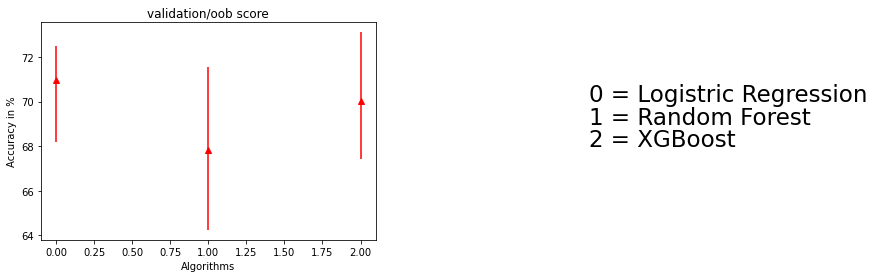

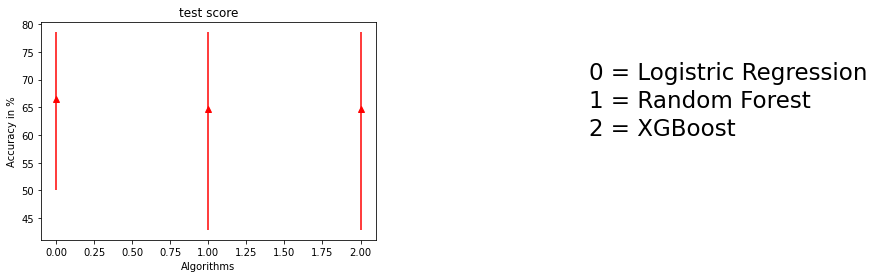

In [3]:
x = (0,1,2)
y = (70.99, 67.85, 70.01)
plt.figure()
yerr = np.array([(2.81,1.5),(3.6, 3.7), (2.6, 3.1)]).T
plt.errorbar(x, y, yerr, fmt='r^')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy in %")
plt.title("validation/oob score")
plt.text(3.5, 70, '0 = Logistric Regression', fontsize = 23)
plt.text(3.5, 69, '1 = Random Forest', fontsize = 23)
plt.text(3.5, 68, '2 = XGBoost', fontsize = 23)
#plt.legend(['First line', 'Second line','Third Line'])
plt.show()

x_test = [0, 1, 2]
y_test = [66.42, 64.63, 64.63]
plt.figure()
y_err_test = np.array([(16.42, 12.14),(21.78, 13.93), (21.78, 13.93)]).T
plt.errorbar(x_test, y_test, y_err_test, fmt='r^')
plt.title("test score")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy in %")
plt.text(3.5, 70, '0 = Logistric Regression', fontsize = 23)
plt.text(3.5, 65, '1 = Random Forest', fontsize = 23)
plt.text(3.5, 60, '2 = XGBoost', fontsize = 23)
plt.show()